# Skin detection

In [1]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

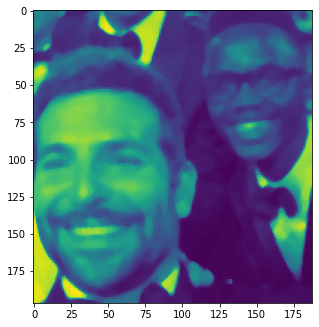

In [2]:
img = cv2.imread('images/BC.jpeg') 

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.medianBlur(img1,5)
plt.figure(figsize=(5,10))
plt.imshow(img1);

# sogliatura

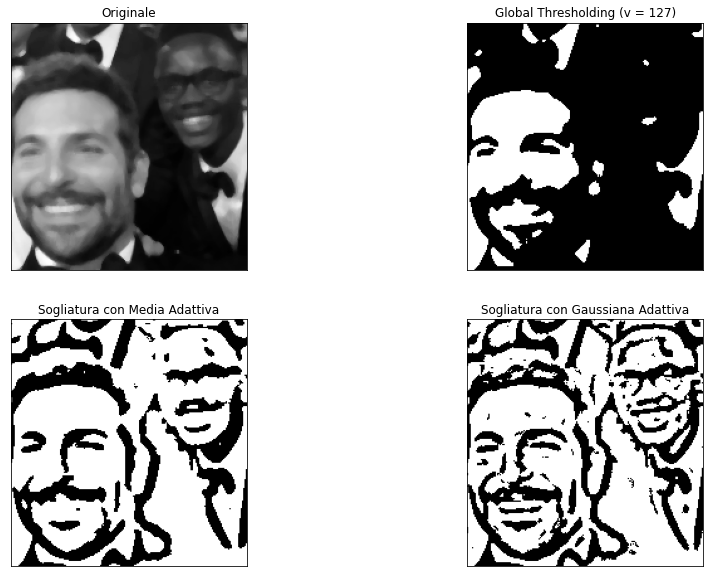

In [3]:

ret,th1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img1, 255, 
                        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
th3 = cv2.adaptiveThreshold(img1, 255, 
                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 4)

titles = ['Originale', 'Global Thresholding (v = 127)',
            'Sogliatura con Media Adattiva', 'Sogliatura con Gaussiana Adattiva']
plt.figure(figsize=(15,10))

images = [img1, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
#plt.tight_layout()
plt.show()

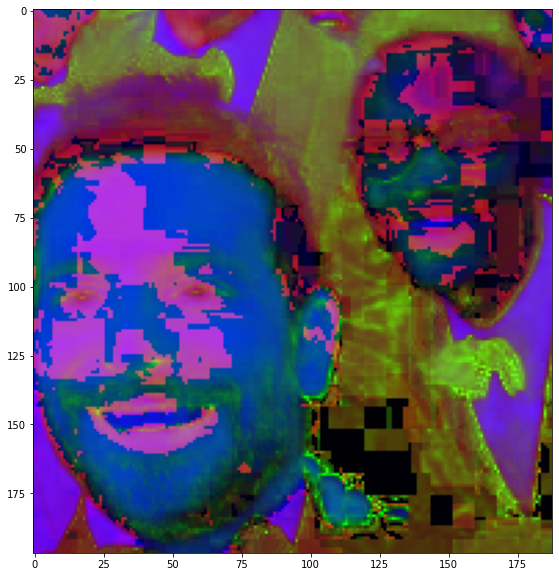

In [4]:
#converting to HSV
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(15,10))

plt.imshow(HSV_img);

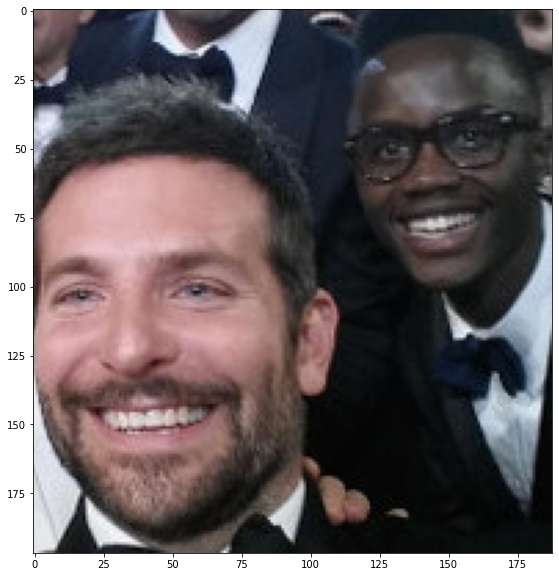

In [5]:
#converting to RGB
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,10))
plt.imshow(RGB_img);


# HSV 

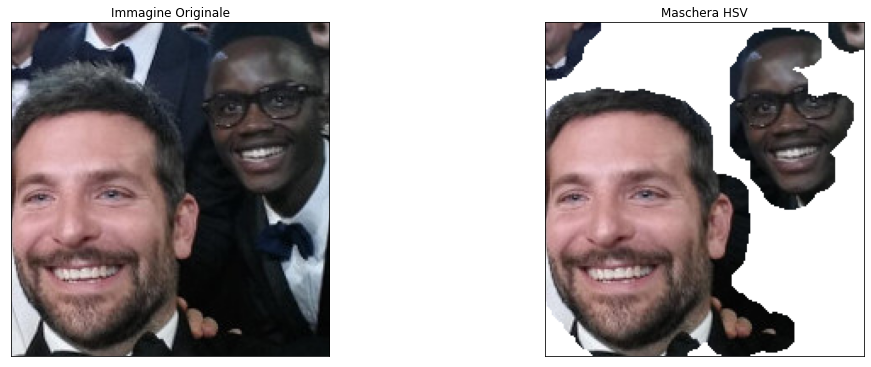

In [6]:
#RGB: (141, 85, 36)
#RGB: (255, 219, 172)

#HSV: (28, 74, 55)
#HSV: (33, 32, 100)

#YCrCb: (0, 133, 80)
#YCrCb: (80, 173, 120)

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 36, 40],np.uint8)
upper = np.array([61, 160, 255],np.uint8)

#create skin mask
skinMask = cv2.inRange(HSV_img, lower, upper)

# blur the mask to help remove noise
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMask = cv2.erode(skinMask, kernel, iterations =0)
skinMask = cv2.dilate(skinMask, kernel, iterations =2)


# apply the mask to the frame
skin = cv2.bitwise_not(img, mask = skinMask)
skin = cv2.bitwise_not(skin, mask = None)
skin = cv2.cvtColor(skin, cv2.COLOR_BGR2RGB)


titles = ['Immagine Originale', 'Maschera HSV']
images = [RGB_img, skin]

plt.figure(figsize=(15,10))
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()




#plt.imshow(skin);

# YCrCb

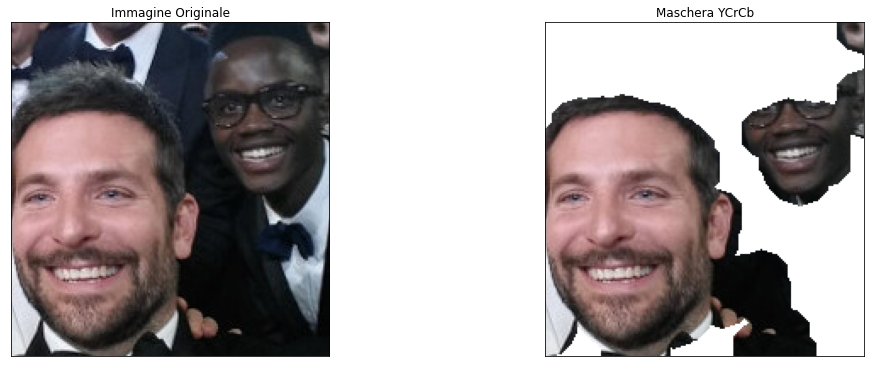

In [7]:
#set the parameters to detect skin color
min_YCrCb= np.array([11, 122, 129],np.uint8)
max_YCrCb= np.array([161, 155, 155],np.uint8)
#min_YCrCb = np.array([0, 133, 80],np.uint8)
#max_YCrCb = np.array([80, 173, 120],np.uint8)
#get image
image = cv2.imread("images/BC.jpeg")
imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)   
#create skin mask
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
# blur the mask to help remove noise
skinRegionYCrCb = cv2.GaussianBlur(skinRegionYCrCb, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinRegionYCrCb = cv2.dilate(skinRegionYCrCb, kernel, iterations = 2)
skinRegionYCrCb = cv2.erode(skinRegionYCrCb, kernel, iterations = 3)


#applies the mask to the image
skin2 = cv2.bitwise_not(image, mask = skinRegionYCrCb)
skin2 = cv2.bitwise_xor(skin2, image, mask = None)


#v2.imwrite("images/oscar.jpeg", np.hstack([image,RGB_skin]))

#convert the image into RGB
RGB_skin = cv2.cvtColor(skin2, cv2.COLOR_BGR2RGB)

titles = ['Immagine Originale', 'Maschera YCrCb']
images = [RGB_img, RGB_skin]

plt.figure(figsize=(15,10))
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()


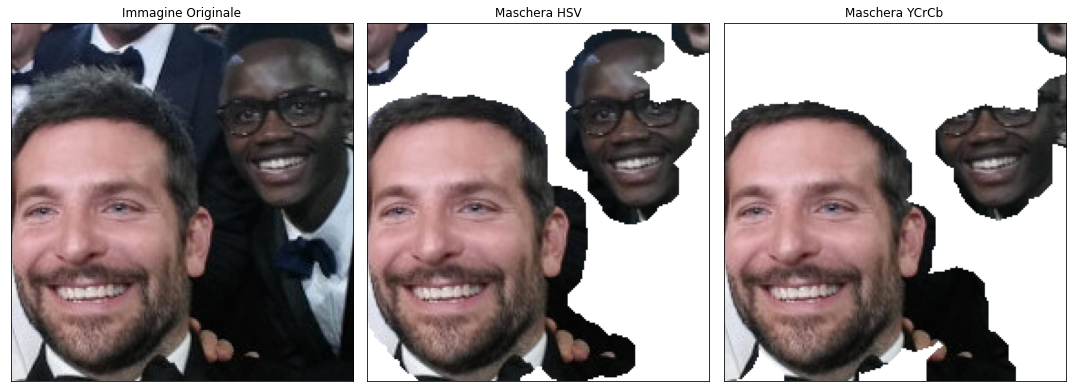

In [8]:
titles = ['Immagine Originale', 'Maschera HSV', 'Maschera YCrCb']
images = [RGB_img, skin, RGB_skin]

plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()